In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import xgboost as xgb


In [2]:
df = pd.read_csv('database.csv', index_col = 0)
df = df[df.position != 'Goalkeeper']


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1608
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   club_name             1521 non-null   object 
 1   player_name           1521 non-null   object 
 2   age                   1521 non-null   int64  
 3   position              1521 non-null   object 
 4   club_involved_name    1521 non-null   object 
 5   fee                   1521 non-null   object 
 6   transfer_movement     1521 non-null   object 
 7   fee_cleaned           1521 non-null   float64
 8   league_name           1521 non-null   object 
 9   year                  1521 non-null   int64  
 10  season                1521 non-null   object 
 11  links                 1521 non-null   object 
 12  Season                1454 non-null   object 
 13  Matches               1454 non-null   float64
 14  Starts                1454 non-null   float64
 15  Minutes              

In [4]:
df.xG.fillna(df.Goals, inplace = True)
df.npxG.fillna(df.Goals - df.Penalty_Goals, inplace = True)
df.xA.fillna(df.Assists, inplace = True)
df['xG/90'].fillna(df['Goals/90'], inplace = True)
df['xA/90'].fillna(df['Assists/90'], inplace = True)
df['xG+xA/90'].fillna(df['Goals+Assists/90'], inplace = True)
df['npxG/90'].fillna(df['Goals-PKs/90'], inplace = True)
df['npxG+xA/90'].fillna(df['Goals+Assists-PKs/90'], inplace = True)


In [5]:
df.dropna(subset = ['Season'], inplace = True)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1608
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   club_name             1454 non-null   object 
 1   player_name           1454 non-null   object 
 2   age                   1454 non-null   int64  
 3   position              1454 non-null   object 
 4   club_involved_name    1454 non-null   object 
 5   fee                   1454 non-null   object 
 6   transfer_movement     1454 non-null   object 
 7   fee_cleaned           1454 non-null   float64
 8   league_name           1454 non-null   object 
 9   year                  1454 non-null   int64  
 10  season                1454 non-null   object 
 11  links                 1454 non-null   object 
 12  Season                1454 non-null   object 
 13  Matches               1454 non-null   float64
 14  Starts                1454 non-null   float64
 15  Minutes              

In [7]:
df.fillna(0, inplace = True)


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1608
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   club_name             1454 non-null   object 
 1   player_name           1454 non-null   object 
 2   age                   1454 non-null   int64  
 3   position              1454 non-null   object 
 4   club_involved_name    1454 non-null   object 
 5   fee                   1454 non-null   object 
 6   transfer_movement     1454 non-null   object 
 7   fee_cleaned           1454 non-null   float64
 8   league_name           1454 non-null   object 
 9   year                  1454 non-null   int64  
 10  season                1454 non-null   object 
 11  links                 1454 non-null   object 
 12  Season                1454 non-null   object 
 13  Matches               1454 non-null   float64
 14  Starts                1454 non-null   float64
 15  Minutes              

In [9]:
df.Minutes = df.Minutes.apply(lambda x: str(x).replace(',', ''))


In [10]:
df.Minutes = df.Minutes.astype('int64')


In [11]:
df.position.value_counts()


Centre-Back           281
Centre-Forward        265
Central Midfield      207
Left Winger           123
Right Winger          117
Right-Back            116
Left-Back             114
Defensive Midfield    111
Attacking Midfield     73
Left Midfield          20
Second Striker         16
Right Midfield         11
Name: position, dtype: int64

In [12]:
defence_dic = {'Centre-Back': 1, 'Centre-Forward': 0, 'Central Midfield': 0, 'Left Winger': 0, 'Right Winger': 0,
               'Right-Back': 1, 'Left-Back': 1, 'Defensive Midfield': 0, 'Goalkeeper': 1, 'Attacking Midfield': 0,
               'Left Midfield': 0, 'Second Striker': 0, 'Right Midfield': 0}
midfield_dic = {'Centre-Back': 0, 'Centre-Forward': 0, 'Central Midfield': 1, 'Left Winger': 0, 'Right Winger': 0,
                'Right-Back': 0, 'Left-Back': 0, 'Defensive Midfield': 1, 'Goalkeeper': 0, 'Attacking Midfield': 1,
                'Left Midfield': 1, 'Second Striker': 0, 'Right Midfield': 1}
attack_dic = {'Centre-Back': 0, 'Centre-Forward': 1, 'Central Midfield': 0, 'Left Winger': 1, 'Right Winger': 1,
              'Right-Back': 0, 'Left-Back': 0, 'Defensive Midfield': 0, 'Goalkeeper': 0, 'Attacking Midfield': 0,
              'Left Midfield': 0, 'Second Striker': 1, 'Right Midfield': 0}


In [13]:
df['is_defence'] = df.position.replace(defence_dic)
df['is_midfield'] = df.position.replace(midfield_dic)
df['is_attack'] = df.position.replace(attack_dic)

<AxesSubplot:xlabel='year'>

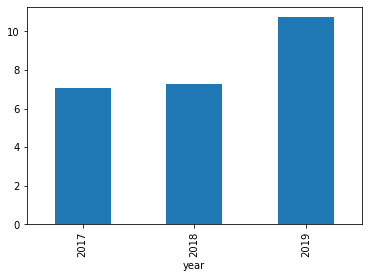

In [14]:
df.groupby('year').fee_cleaned.mean().plot(kind = 'bar')

<AxesSubplot:xlabel='league_name'>

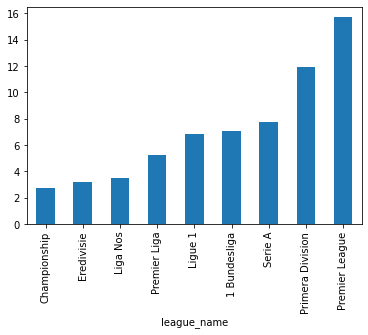

In [15]:
df.groupby('league_name').fee_cleaned.mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='age'>

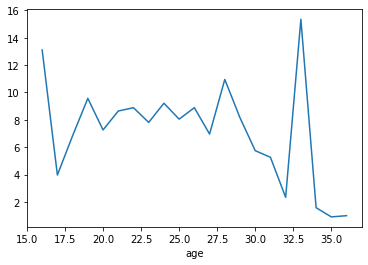

In [16]:
df.groupby('age').fee_cleaned.mean().plot()

<AxesSubplot:xlabel='position'>

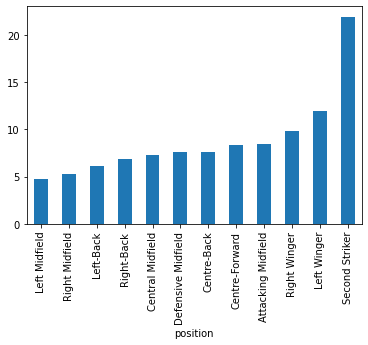

In [17]:
df.groupby('position').fee_cleaned.mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='fee_cleaned'>

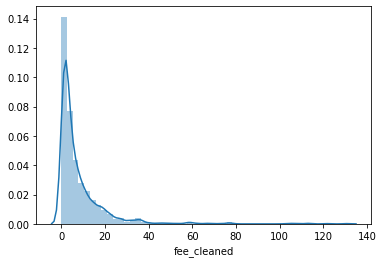

In [18]:
sns.distplot(df.fee_cleaned)

In [19]:
df.fee_cleaned.describe()

count    1454.000000
mean        8.219279
std        12.498243
min         0.045000
25%         1.800000
50%         4.050000
75%         9.900000
max       130.500000
Name: fee_cleaned, dtype: float64

In [20]:
df_features = df[['age','position','Starts','Minutes','Goals','Assists','Penalty_Goals','Penalty_Attempts',
                  'Yellow_Cards','Red_Cards','Goals/90','Assists/90','Goals+Assists/90','Goals-PKs/90',
                  'Goals+Assists-PKs/90','xG','npxG','xA','xG/90','xA/90','xG+xA/90','npxG/90','npxG+xA/90',
                  'is_defence', 'is_midfield', 'is_attack']]
df_target = df.fee_cleaned

In [21]:
df_categoricals = df_features[['position', 'is_defence', 'is_midfield', 'is_attack']]
df_features.columns

Index(['age', 'position', 'Starts', 'Minutes', 'Goals', 'Assists',
       'Penalty_Goals', 'Penalty_Attempts', 'Yellow_Cards', 'Red_Cards',
       'Goals/90', 'Assists/90', 'Goals+Assists/90', 'Goals-PKs/90',
       'Goals+Assists-PKs/90', 'xG', 'npxG', 'xA', 'xG/90', 'xA/90',
       'xG+xA/90', 'npxG/90', 'npxG+xA/90', 'is_defence', 'is_midfield',
       'is_attack'],
      dtype='object')

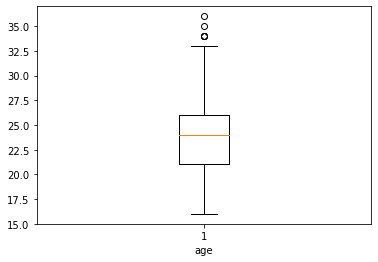

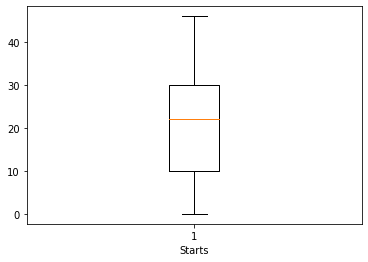

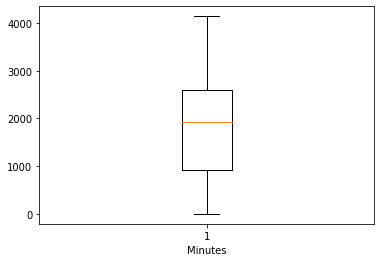

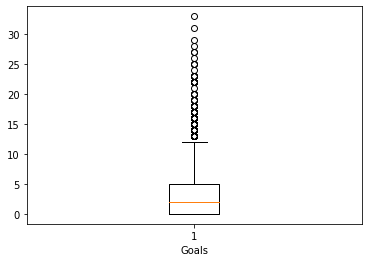

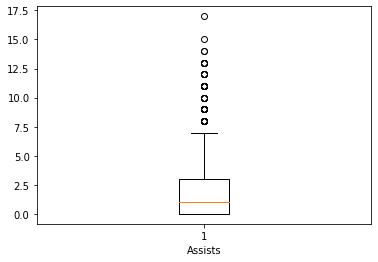

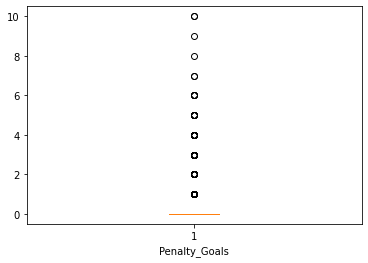

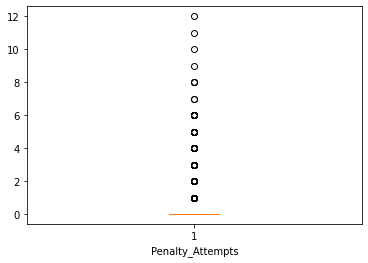

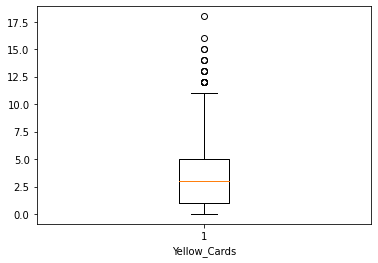

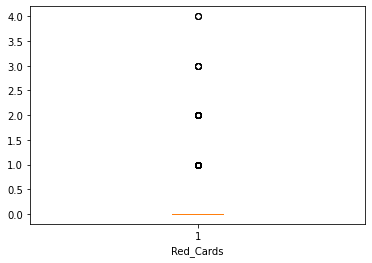

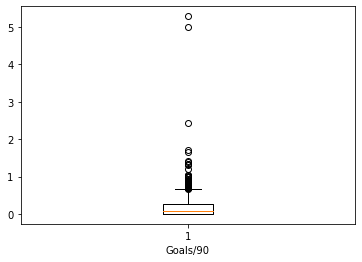

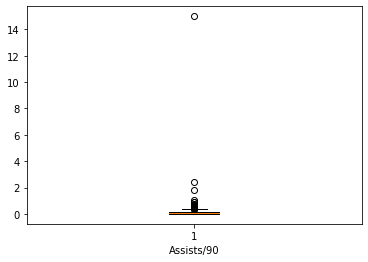

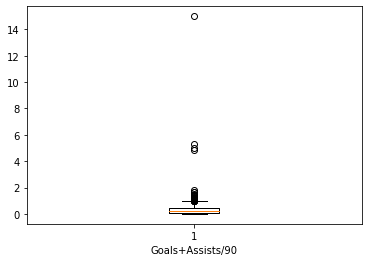

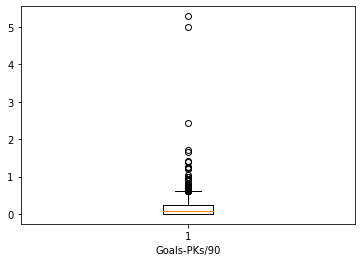

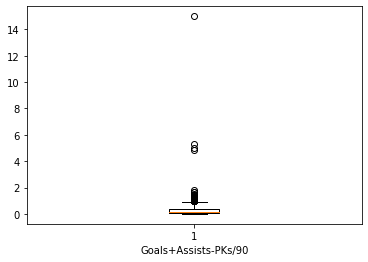

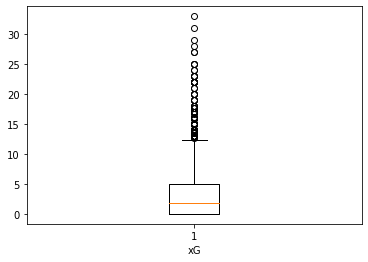

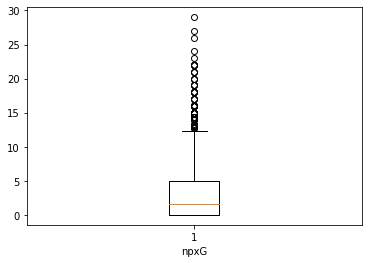

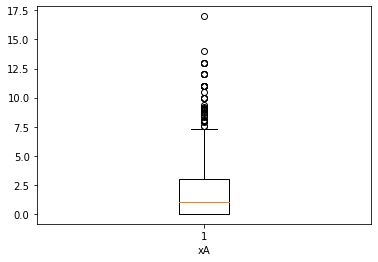

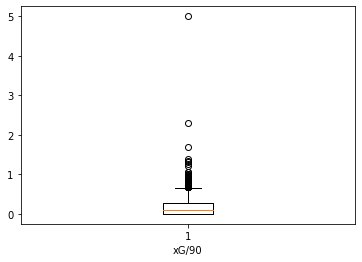

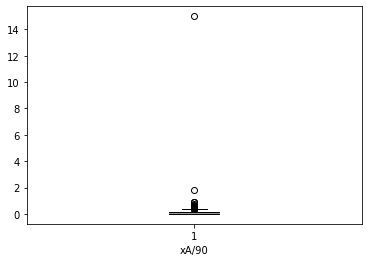

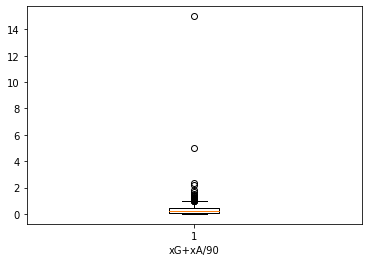

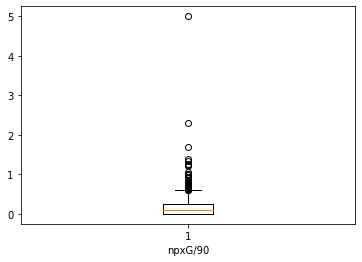

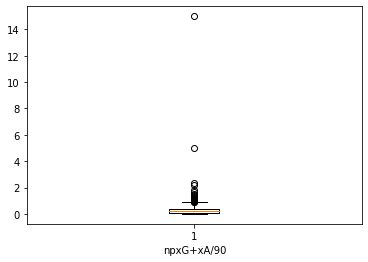

In [22]:
for column in df_features.columns:
    if column not in df_categoricals.columns:
        plt.boxplot(df_features[column])
        plt.xlabel(column)
        plt.show()

In [23]:
df_features['Goals/90'] = df_features['Goals/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Assists/90'] = df_features['Assists/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Goals+Assists/90'] = df_features['Goals+Assists/90'].apply(lambda x: np.where(x > 3, 3, x))
df_features['Goals-PKs/90'] = df_features['Goals-PKs/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['Goals+Assists-PKs/90'] = df_features['Goals+Assists-PKs/90'].apply(lambda x: np.where(x > 3, 3, x))
df_features['xA'] = df_features['xA'].apply(lambda x: np.where(x > 15, 15, x))
df_features['xG/90'] = df_features['xG/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['xA/90'] = df_features['xA/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['xG+xA/90'] = df_features['xG+xA/90'].apply(lambda x: np.where(x > 4, 4, x))
df_features['npxG/90'] = df_features['npxG/90'].apply(lambda x: np.where(x > 2, 2, x))
df_features['npxG+xA/90'] = df_features['npxG+xA/90'].apply(lambda x: np.where(x > 3, 3, x))

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

/Users/ericadsetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


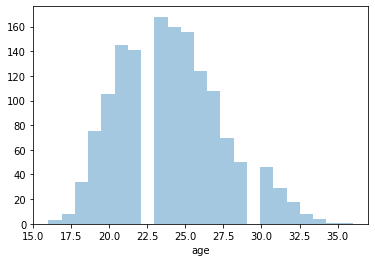

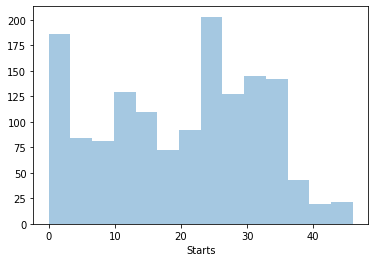

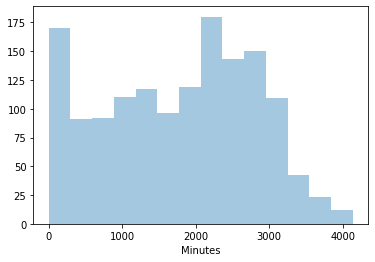

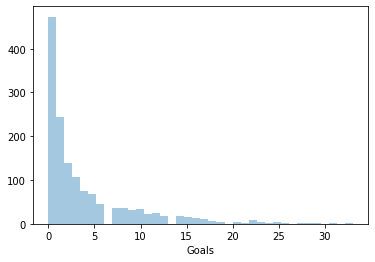

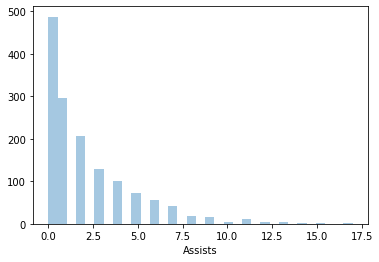

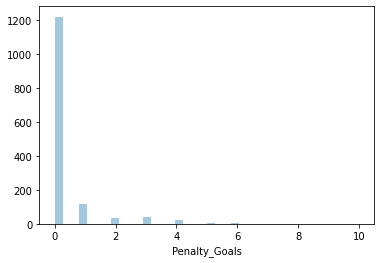

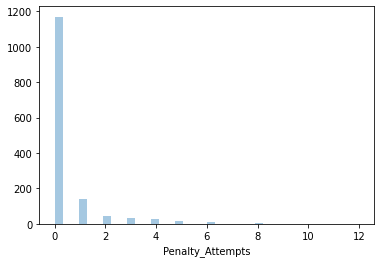

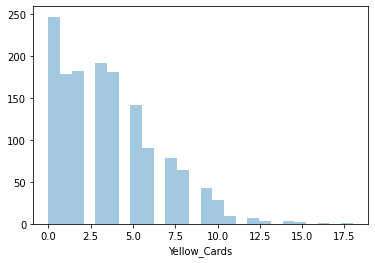

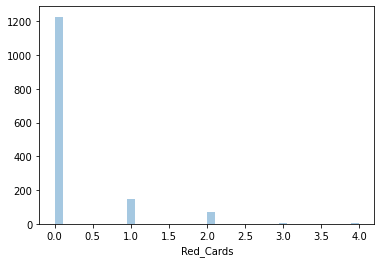

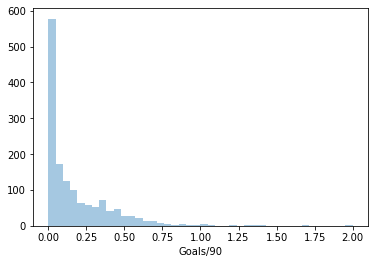

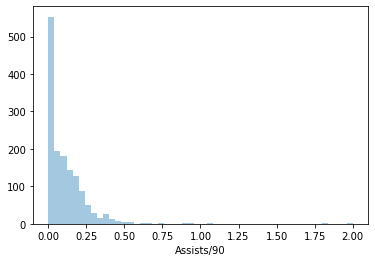

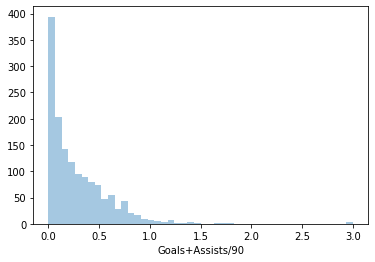

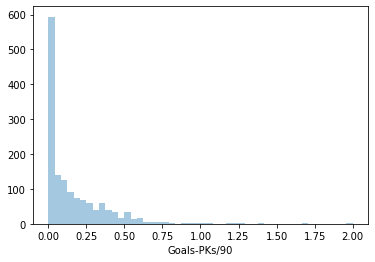

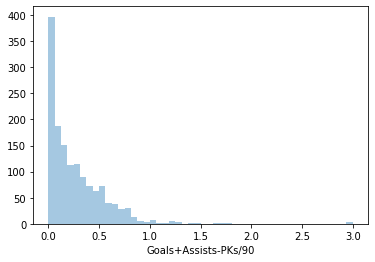

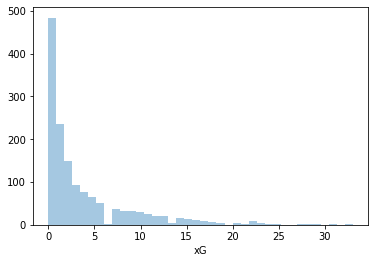

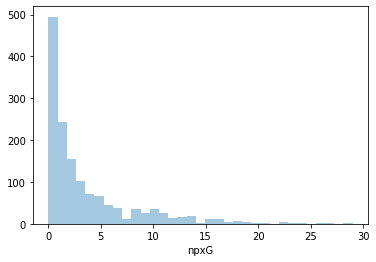

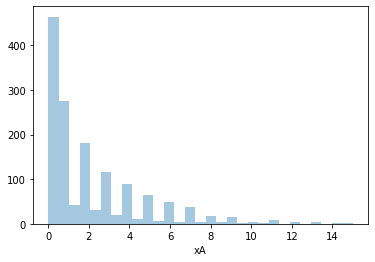

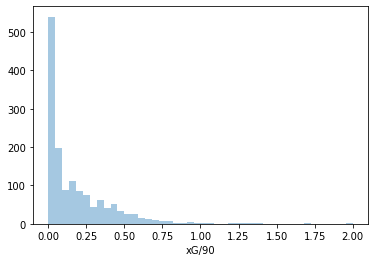

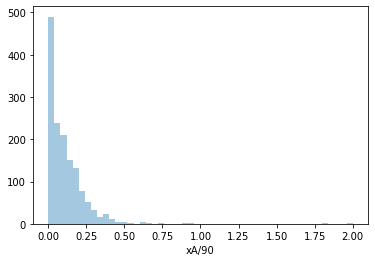

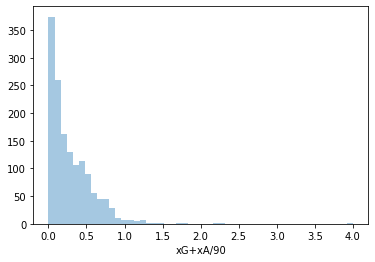

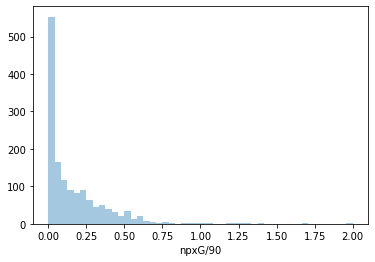

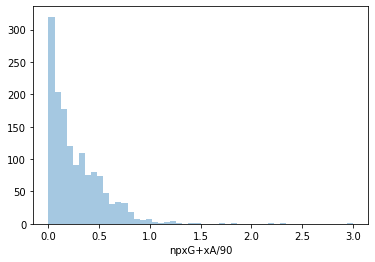

<Figure size 432x288 with 0 Axes>

In [24]:
for column in df_features.columns:
    if column not in df_categoricals.columns:
        sns.distplot(df_features[column], kde = False)
        figure  = plt.figure()

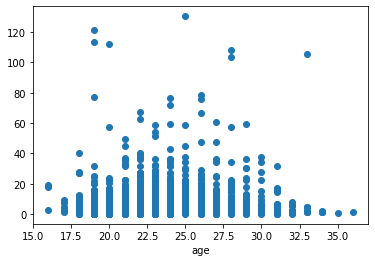

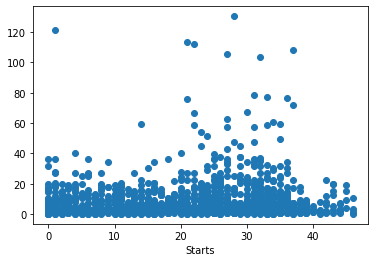

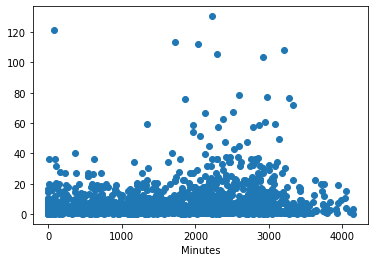

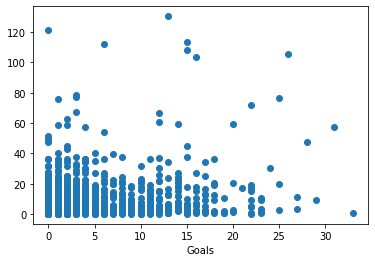

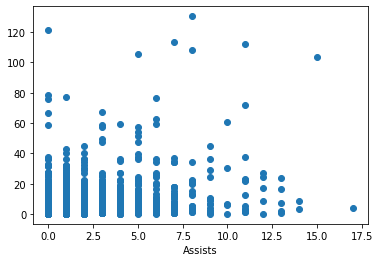

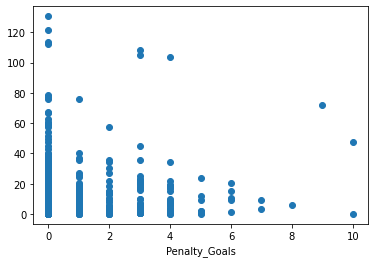

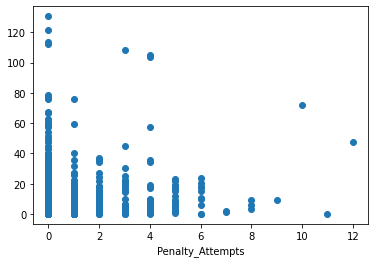

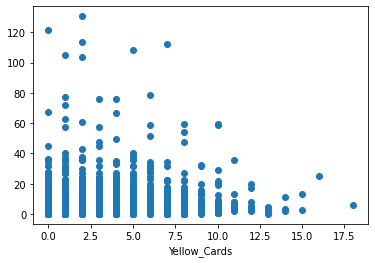

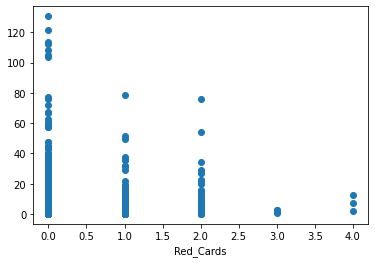

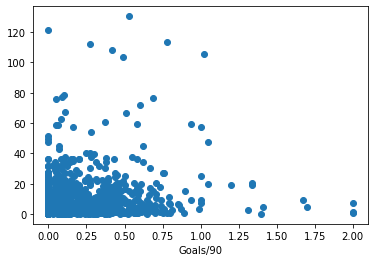

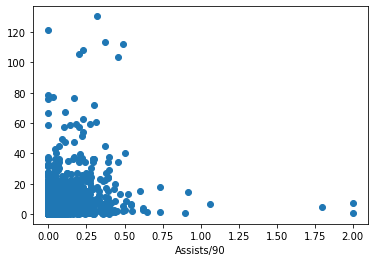

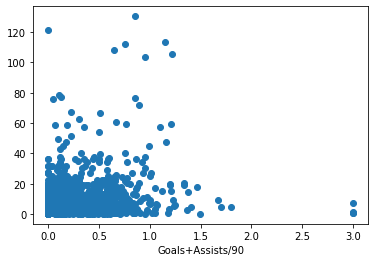

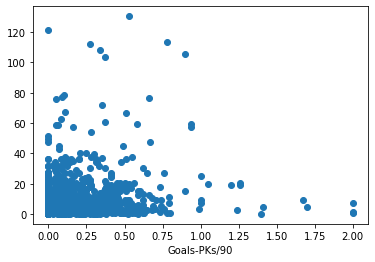

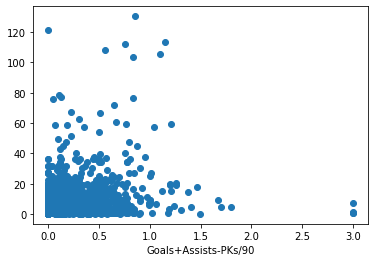

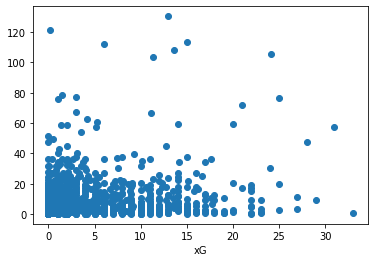

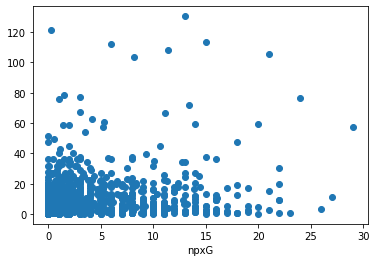

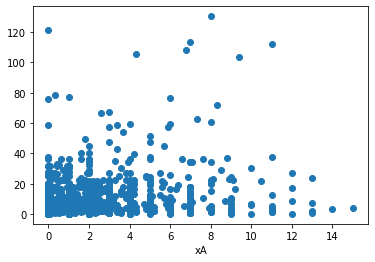

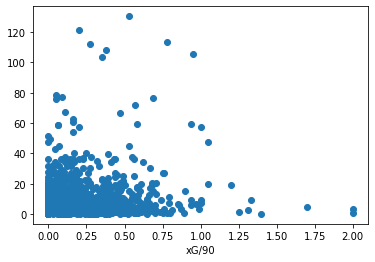

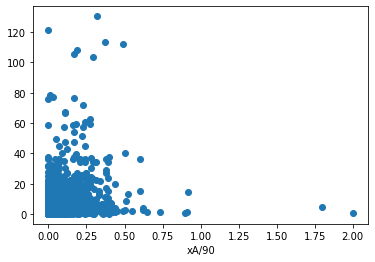

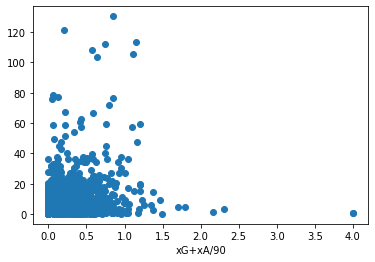

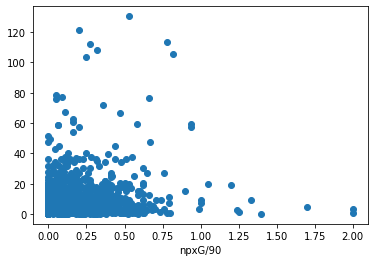

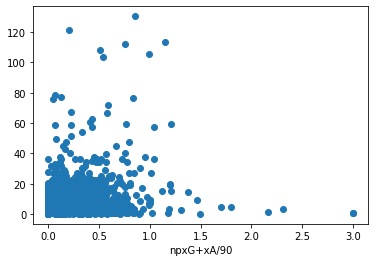

In [25]:
for column in df_features.columns:
    if column not in df_categoricals.columns:
        plt.scatter(df_features[column], df_target)
        plt.xlabel(column)
        plt.show()

In [26]:
df_dummies = pd.get_dummies(df_features.position)
df_features = pd.concat([df_features, df_dummies], axis = 1)
df_features.drop(['position'], axis = 1, inplace = True)


In [27]:
df_features.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1608
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1454 non-null   int64  
 1   Starts                1454 non-null   float64
 2   Minutes               1454 non-null   int64  
 3   Goals                 1454 non-null   float64
 4   Assists               1454 non-null   float64
 5   Penalty_Goals         1454 non-null   float64
 6   Penalty_Attempts      1454 non-null   float64
 7   Yellow_Cards          1454 non-null   float64
 8   Red_Cards             1454 non-null   float64
 9   Goals/90              1454 non-null   float64
 10  Assists/90            1454 non-null   float64
 11  Goals+Assists/90      1454 non-null   float64
 12  Goals-PKs/90          1454 non-null   float64
 13  Goals+Assists-PKs/90  1454 non-null   float64
 14  xG                    1454 non-null   float64
 15  npxG                 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, random_state = 42)


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
y_train_preds = dummy.predict(X_train)
mean_squared_error(y_train, y_train_preds)


158.15677677430855

In [31]:
y_preds = dummy.predict(X_test)
mean_squared_error(y_test, y_preds)


149.98369916362367

In [32]:
line = LinearRegression(n_jobs = -1)
line.fit(X_train, y_train)
y_train_preds = line.predict(X_train)
mean_squared_error(y_train, y_train_preds)


142.68435426914832

In [33]:
y_preds = line.predict(X_test)
mean_squared_error(y_test, y_preds)


131.24352144016885

In [34]:
sorted(list(zip(line.coef_, df_features.columns)))


[(-56.21940321634334, 'xG'),
 (-17.767702895212466, 'npxG/90'),
 (-17.54719936907125, 'Goals+Assists/90'),
 (-10.651957365421564, 'Goals/90'),
 (-4.9559338413847716, 'Starts'),
 (-4.477631139455966, 'xG+xA/90'),
 (-0.9737462780028965, 'Yellow_Cards'),
 (-0.7397352208819165, 'Left Midfield'),
 (-0.6268355983623553, 'age'),
 (-0.531922583738871, 'Centre-Forward'),
 (-0.39351312789187526, 'Right Midfield'),
 (-0.33580308247863044, 'Left-Back'),
 (-0.22061235957192574, 'Right-Back'),
 (-0.2014082309902449, 'Attacking Midfield'),
 (-0.18101153576599924, 'xA/90'),
 (-0.15897542245618887, 'Central Midfield'),
 (-0.14935718264873116, 'Right Winger'),
 (-0.1267943474773311, 'is_attack'),
 (-0.12484184220299442, 'is_midfield'),
 (-0.06958935242992506, 'Red_Cards'),
 (-0.05365478305564273, 'Penalty_Attempts'),
 (0.2456177996201387, 'is_defence'),
 (0.34373935917920145, 'Left Winger'),
 (0.4116549665592926, 'xA'),
 (0.597054183866855, 'Defensive Midfield'),
 (0.6519113974397006, 'Centre-Back'),
 (

In [35]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_train_preds = ridge.predict(X_train)
mean_squared_error(y_train, y_train_preds)


143.51255301488732

In [36]:
y_preds = ridge.predict(X_test)
mean_squared_error(y_test, y_preds)


131.5378701871753

In [66]:
param_grid = {'alpha': [.01,.1,.5,1,5,10,15, 20, 25, 30, 100, 1000, 1500, 2500]}
ridge_CV = GridSearchCV(ridge, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
ridge_CV.fit(X_train, y_train)
print(ridge_CV.best_score_)
print(ridge_CV.best_params_)
y_preds = ridge_CV.predict(X_test)
mean_squared_error(y_test, y_preds)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
-12.14756156929301
{'alpha': 1000}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished


135.0554309351698

In [37]:
sorted(list(zip(ridge.coef_, df_features.columns)))


[(-12.290572767573387, 'xG'),
 (-3.547472730272181, 'Starts'),
 (-2.5371851801728393, 'Goals+Assists/90'),
 (-2.3901523470822963, 'xG+xA/90'),
 (-1.1753439356440365, 'Penalty_Attempts'),
 (-0.9333628605569633, 'Yellow_Cards'),
 (-0.8020203027514491, 'Goals/90'),
 (-0.742306758867302, 'Left Midfield'),
 (-0.6432094674525344, 'age'),
 (-0.48186052447345706, 'Centre-Forward'),
 (-0.3943824762050621, 'Right Midfield'),
 (-0.33958101402236923, 'Left-Back'),
 (-0.2361140945299251, 'Attacking Midfield'),
 (-0.21252790803967164, 'Right-Back'),
 (-0.19069456025870604, 'Right Winger'),
 (-0.16888505106331664, 'xA'),
 (-0.16045005538051063, 'Central Midfield'),
 (-0.14625383766148187, 'is_midfield'),
 (-0.09944187953594681, 'is_attack'),
 (-0.06406091586540656, 'Red_Cards'),
 (0.23879121358907016, 'is_defence'),
 (0.34305985828229313, 'Left Winger'),
 (0.47226025730042637, 'npxG/90'),
 (0.5940487212510209, 'Defensive Midfield'),
 (0.6030785488911407, 'xA/90'),
 (0.640815168709834, 'Centre-Back'),

In [38]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_train_preds = lasso.predict(X_train)
mean_squared_error(y_train, y_train_preds)


150.96405191159712

In [39]:
y_preds = lasso.predict(X_test)
mean_squared_error(y_test, y_preds)


140.30379305337658

In [68]:
param_grid = {'alpha': [.01,.1,.5,1,5,10]}
lasso_CV = GridSearchCV(lasso, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
lasso_CV.fit(X_train, y_train)
print(lasso_CV.best_score_)
print(lasso_CV.best_params_)
y_preds = lasso_CV.predict(X_test)
mean_squared_error(y_test, y_preds)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
-12.169630941838868
{'alpha': 0.5}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


136.46720686715707

In [40]:
sorted(list(zip(lasso.coef_, df_features.columns)))


[(0.0, 'Assists/90'),
 (-0.0, 'Attacking Midfield'),
 (-0.0, 'Central Midfield'),
 (0.0, 'Centre-Back'),
 (-0.0, 'Centre-Forward'),
 (0.0, 'Defensive Midfield'),
 (0.0, 'Goals+Assists-PKs/90'),
 (0.0, 'Goals+Assists/90'),
 (0.0, 'Goals-PKs/90'),
 (0.0, 'Goals/90'),
 (-0.0, 'Left Midfield'),
 (0.0, 'Left Winger'),
 (-0.0, 'Left-Back'),
 (0.0, 'Minutes'),
 (0.0, 'Penalty_Attempts'),
 (0.0, 'Penalty_Goals'),
 (-0.0, 'Red_Cards'),
 (-0.0, 'Right Midfield'),
 (0.0, 'Right Winger'),
 (-0.0, 'Right-Back'),
 (0.0, 'Second Striker'),
 (0.0, 'Starts'),
 (-0.0, 'Yellow_Cards'),
 (-0.0, 'age'),
 (0.0, 'is_attack'),
 (-0.0, 'is_defence'),
 (-0.0, 'is_midfield'),
 (0.0, 'npxG'),
 (0.0, 'npxG+xA/90'),
 (0.0, 'npxG/90'),
 (0.0, 'xA'),
 (0.0, 'xA/90'),
 (0.0, 'xG'),
 (0.0, 'xG+xA/90'),
 (0.0, 'xG/90'),
 (0.7400692678152119, 'Goals'),
 (1.2762662845964627, 'Assists')]

In [41]:
svr = SVR()
svr.fit(X_train, y_train)
y_train_preds = svr.predict(X_train)
mean_squared_error(y_train, y_train_preds)


164.958054903222

In [42]:
y_preds = svr.predict(X_test)
mean_squared_error(y_test, y_preds)


158.27376011007516

In [73]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'degree': [.5,1,2,3], 'C': [1,5,10,25,50], 'epsilon': [.1, .5, 1, 5, 10]}
svr_CV = GridSearchCV(svr, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
svr_CV.fit(X_train, y_train)
print(svr_CV.best_score_)
print(svr_CV.best_params_)
y_preds = svr_CV.predict(X_test)
mean_squared_error(y_test, y_preds)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:   40.6s


-12.192840629208913
{'C': 10, 'degree': 0.5, 'epsilon': 5, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   53.4s finished


142.16443119520596

In [74]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_train_preds = tree.predict(X_train)
mean_squared_error(y_train, y_train_preds)


0.32988618623853205

In [75]:
y_preds = tree.predict(X_test)
mean_squared_error(y_test, y_preds)


281.0750693331044

In [81]:
param_grid = {'max_depth': [None, 1, 2, 5, 10], 'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}
tree_CV = GridSearchCV(tree, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
tree_CV.fit(X_train, y_train)
print(tree_CV.best_score_)
print(tree_CV.best_params_)
y_preds = tree_CV.predict(X_test)
mean_squared_error(y_test, y_preds)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


-12.214885057595279
{'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    1.3s finished


153.38535002126525

In [79]:
rf = RandomForestRegressor(n_jobs = -1)
rf.fit(X_train, y_train)
y_train_preds = rf.predict(X_train)
mean_squared_error(y_train, y_train_preds)


22.81518064365565

In [46]:
y_preds = rf.predict(X_test)
mean_squared_error(y_test, y_preds)


134.43913886459927

In [91]:
param_grid = {'n_estimators': [5, 10, 25,50,100,500], 'max_depth': [None, 1, 2, 3, 4, 5, 10],
              'min_samples_split': [2,4,6,8,10,15,20]}
rf_CV = GridSearchCV(rf, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
rf_CV.fit(X_train, y_train)
print(rf_CV.best_score_)
print(rf_CV.best_params_)
y_preds = rf_CV.predict(X_test)
mean_squared_error(y_test, y_preds)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:  2.2min finished


-12.116747717351812
{'max_depth': 2, 'min_samples_split': 15, 'n_estimators': 10}


135.27723156229624

In [99]:
xg = xgb.XGBRegressor(n_jobs = -1, objective = 'reg:squarederror', eval_metric = 'rmse')
xg.fit(X_train, y_train)
y_train_preds = xg.predict(X_train)
mean_squared_error(y_train, y_train_preds)


1.476298015111357

In [100]:
y_preds = xg.predict(X_test)
mean_squared_error(y_test, y_preds)


162.03224820607335

In [101]:
sorted(zip(xg.feature_importances_, df_features.columns))


[(0.0044081816, 'Left-Back'),
 (0.004467047, 'Penalty_Attempts'),
 (0.0047162347, 'Central Midfield'),
 (0.0072989124, 'Defensive Midfield'),
 (0.00811699, 'Right Winger'),
 (0.00859931, 'Assists/90'),
 (0.009251139, 'Centre-Back'),
 (0.009873895, 'Right-Back'),
 (0.01032367, 'is_defence'),
 (0.010406257, 'xA/90'),
 (0.010441739, 'Red_Cards'),
 (0.012015592, 'Right Midfield'),
 (0.012033916, 'Left Midfield'),
 (0.012538184, 'Starts'),
 (0.012557619, 'age'),
 (0.013130587, 'Centre-Forward'),
 (0.014046554, 'is_midfield'),
 (0.015302745, 'Minutes'),
 (0.015870897, 'Goals-PKs/90'),
 (0.016197294, 'Attacking Midfield'),
 (0.018368926, 'Yellow_Cards'),
 (0.019278776, 'Goals/90'),
 (0.020559067, 'xG/90'),
 (0.021760605, 'npxG'),
 (0.025872208, 'Goals+Assists-PKs/90'),
 (0.026402956, 'npxG+xA/90'),
 (0.033240046, 'Goals'),
 (0.033254035, 'xA'),
 (0.03825296, 'xG+xA/90'),
 (0.039958697, 'xG'),
 (0.044858325, 'Goals+Assists/90'),
 (0.055941634, 'npxG/90'),
 (0.058066867, 'Penalty_Goals'),
 (0.0

In [113]:
param_grid = {'eta': [1e-100, 1e-50, 1e-20, 1e-10,.000000001, .00000001],
              'max_depth': [1,2,3],
              'min_child_weight': [15,20, 25, 30, 50, 75,  100]}
xg_CV = GridSearchCV(xg, param_grid, scoring = 'neg_root_mean_squared_error', n_jobs = -1, verbose = 1)
xg_CV.fit(X_train, y_train)
print(xg_CV.best_score_)
print(xg_CV.best_params_)
y_preds = xg_CV.predict(X_test)
mean_squared_error(y_test, y_preds)

Fitting 5 folds for each of 189 candidates, totalling 945 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:    9.5s


-12.041900684138943
{'eta': 1e-20, 'max_depth': 1, 'min_child_weight': 50}


[Parallel(n_jobs=-1)]: Done 945 out of 945 | elapsed:   13.7s finished


130.42788322745764